**Project Kapita Selekta Fisika Komputasi**
# SIMULASI PENGHILANG NOISE PADA SINYAL SUARA MENGGUNAKAN FAST FOURIER TRANSORM (FFT)

**A. Latar Belakang**

Saat ini, perkembangan teknologi sudah semakin pesat. Berbagai alat elektronik canggih bermunculan demi memudahkan aktivitas sehari-hari, salah satunya adalah untuk mengirim dan menerima data. Contoh sederhana dari implementasi tersebut adalah sinyal suara, dimana sinyal suara ini banyak digunakan untuk komunikasi, merekam musik, sound effect, dan lain sebagainya. Akan tetapi, tak jarang sinyal suara yang diterima mengandung noise atau terputus-putus. Hal tersebut dapat terjadi karena gangguan suara dari lingkungan sekitar yang disebabkan oleh cuaca, keramaian, lingkungan luar, dan lain lain. Terdapat banyak cara yang dapat dilakukan untuk menghilangkan noise yang tercampur pada sinyal suara salah satunya adalah dengan menggunakan Fast Fourier Transform (FFT).  

Fast Fourier Transform (FFT) adalah teknik perhitungan operasi matematika yang digunakan untuk  mentrasformasi  sinyal  analog  menjadi  sinyal  digital  berbasis  frekuensi. FFT membagi sebuah sinyal menjadi frekuensi yang berbeda-beda dalam fungsi eksponensial yang kompleks. FFT adalah suatu algoritma yang digunakan untuk merepresentasikan sinyal dalam domain waktu diskrit dan domain frekuensi. 

Untuk menghilangkan noise pada sinyal audio, maka kami membuat sebuah project dengan menggunakan FFT sehingga project ini dapat digunakan untuk membantu menghasilkan sinyal audio yang lebih jernih tanpa adanya noise atau gangguan suara.

**B. Permasalahan**

Pada project ini, kami menemukan sebuah permasalahan mengenai data audio. Permasalahan yang sering terjadi pada data audio merupakan adanya noise atau gangguan suara ketika melakukan perekaman suara yang menyebabkan turunnya kualitas dari data suara yang dihasilkan. Noise yang muncul saat melakukan rekaman suara biasanya terjadi karena adanya suara-suara di lingkungan sekitar, angin yang terhembus kearah microphone, dan gangguan suara lainnya. Dengan adanya permasalahan tersebut, kami membuat project yang bertujuan untuk menyelesaikan permasalahan adanya noise pada data suara hasil dari rekaman suara dengan metode Fast Fourier Transform (FFT).

**C. Metode Penyelesaian**

1. Identifikasi Permasalahan

    Pada tahap awal project ini, kami menemukan sebuah permasalahan mengenai sinyal audio yang seringkali diterima tidak sesuai yang diinginkan karena dalam sinyal audio tersebut terdapat noise dan juga suara pada sinyal tersebut terputus-putus. Dengan adanya permasalahan tersebut, kami membuat project yang bertujuan untuk menyelesaikan permasalahan adanya noise pada data suara hasil dari rekaman suara dengan metode yang digunakan pada penelitian ini.

2. Pengumpulan Data

    Data yang digunakan dalam project ini berupa suara hasil rekaman. Suara yang telah direkam kemudian disimpan dalam format WAV untuk kemudian akan dibaca oleh program penghilang noise yang telah kami buat.

3. Kebutuhan Perangkat Keras dan Perangkat Lunak

    Dalam membuat project ini, kami menggunakan aplikasi perangkat lunak dan perangkat keras sebagai berikut:  
    a. Laptop  
    b. Handphone/Perekam suara  
    c. Jupyter Notebook/Google Collaboratory  

4. Membuat program dengan menggunakan metode Fast Fourier Transform (FFT)

    Tujuan dari project ini adalah untuk membuat sebuah program yang memiliki fungsi untuk menghilangkan atau meminimalisir noise yang ada pada data suara hasil rekaman. Program pada penelitian ini menerapakan perhitungan FFT untuk menghilangkan noise.

5. Menguji Program

    Setelah program berhasil dibuat dan siap digunakan, langkah berikutnya adalah melakukan pengujian pada program dengan memasukkan data sinyal audio. Apabila program berjalan dengan baik, maka program akan menampilkan sebuah grafik data suara rekaman asli dan data suara hasil dari penerapan FFT.

**D. Hasil Komputasi**

In [1]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import wavio
from scipy.io import wavfile
from IPython.display import Audio

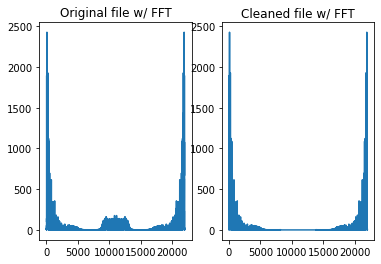

In [2]:
def processFile(fn, offset) :
    # Read in wav file and perform FFT
    data, samplerate = sf.read(filename)
    fft = np.fft.fft(data)
    
    # Arange the data given and extract a midpoint
    x = np.arange(0, samplerate, samplerate/len(fft))
    mid = len(x)/2
    
    # Plot Original data w/ fft
    plt.subplot(121)
    plt.title('Original file w/ FFT')
    plt.plot(x, abs(fft))
    
    # Set variables to know when to stop offset to left and right
    i = int(mid - offset)
        
    # Offset all values starting at left and stopping once we reach right offset
    while(i < (mid + offset)):
        fft[i] = 0
        i += 1
        
    # Plot the new 'clean' sound w/ fft
    plt.subplot(122)
    plt.title('Cleaned file w/ FFT')
    plt.plot(x, abs(fft))  
    
    # Apply inverse of FFt to cleaned signal
    clean = np.fft.ifft(fft)
    
    # Get only real part of signal for new sound file
    clean = np.real(clean)
    sf.write('cleanMusic.wav', clean, samplerate)

    plt.show()

if __name__ == "__main__":
    filename = "music.wav"
    offset = 10000
    processFile(filename, offset)

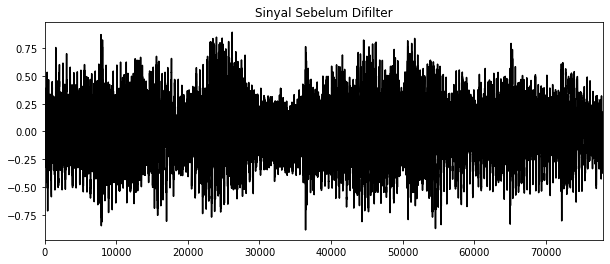

In [3]:
wav_loc = "music.wav"
rate, data = wavfile.read(wav_loc)
data1, sample_rate = librosa.load('music.wav')

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4))
plt.title("Sinyal Sebelum Difilter")
plt.plot(data1, color='black')
ax.set_xlim((0, len(data1)))
plt.show()

IPython.display.Audio(data=data1, rate=sample_rate)

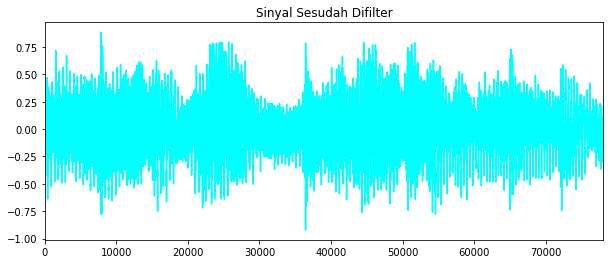

In [4]:
wav_loc = "cleanMusic.wav"
rate, data = wavfile.read(wav_loc)
data2, sample_rate = librosa.load('cleanMusic.wav')

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4))
plt.title("Sinyal Sesudah Difilter")
plt.plot(data2, color='cyan')
ax.set_xlim((0, len(data1)))
plt.show()

IPython.display.Audio(data=data2, rate=sample_rate)

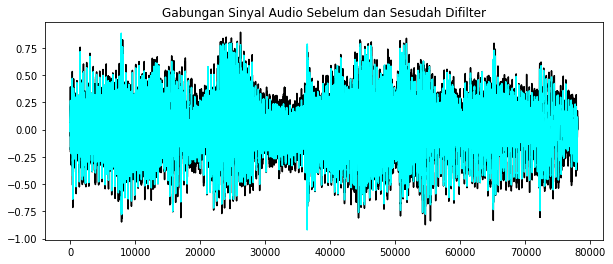

In [6]:
# Gabungan sinyal audio sebelum dan sesudah difilter
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4))
plt.title("Gabungan Sinyal Audio Sebelum dan Sesudah Difilter")
plt.plot(data1, color='black')
plt.plot(data2, color='cyan')
plt.show()

**E. Analisis**

Tahapan pertama yang dilakukan pada project ini adalah mengumpulkan data suara yang diambil atau direkam menggunakan microphone pada handphone. Sampel suara yang digunakan pada penelitian ini yaitu sebanyak satu sampel. Sampel tersebut disimpan kedalam file berformat WAV yang kemudian sinyal suara tersebut ditampilkan dalam bentuk grafik pada program Python.  

Dengan menggunakan metode FFT, sinyal suara yang berisi noise tersebut akan dihilangkan. Untuk penerapan metode FFT menggunakan fungsi atau perintah yang sudah disediakan oleh Python. Kemudian akan didapatkan hasil berupa sinyal suara yang telah dihilangkan noise. Sinyal suara tersebut ditampilkan dalam bentuk grafik.

Pada plot terakhir dapat dilihat bahwa terjadi perbedaan nilai frekuensi yang sangat mencolok setelah dilakukan penghilangan noise dengan metode FFT. Sebagian noise pada sampel tersebut menjadi agak berkurang dan suara dapat didengar jelas. Berdasarkan pengujian yang telah dilakukan dapat disimpulkan bahwa metode FFT dapat diterapkan untuk menghilangkan atau meminimalisir noise pada sinyal suara. Metode FFT dapat menghilangkan noise seperti noise yang disebabkan oleh suara angin dan keramaian.

**F. Referensi**

Bimantara, A. A., Adhi, M. S., Priambodo, D., Azhar, H. M., & Junaidi, A. (2019). Simulasi Penghilangan Noise Pada Sinyal Suara Menggunakan Metode Fast Fourier Transform (FFT). INISTA: Journal of Informatics, Information System, Software Engineering and Applications, 1(2), 20-25.

Darmadi, D., Imansyah, F., & Yacoub, R. R. (2020). Simulasi Eleminasi Noise dengan Metode Transformasi Wavelet Berbantuan Graphical User Interface (GUI) MATLAB. Jurnal Teknik Elektro Universitas Tanjungpura, 1(1).

Sujadi, H., Sopiandi, I., & Mutaqin, A. (2017). Sistem Pengolahan Suara Menggunakan Algoritma FFT (Fast Fourier Transform).

Kusuma, D. T. (2020). Fast Fourier Transform (FFT) Dalam Transformasi Sinyal Frekuensi Suara Sebagai Upaya Perolehan Average Energy (AE) Musik.